source: http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

We shall restrict our attention to 3-dimensional problems for right now (i.e. optimizing over only 2 parameters), though what follows can be extended to higher dimensions by plotting all pairs of parameters against each other, effectively projecting the problem to 3-dimensions. 

The Wikipedia article on [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization) has a few functions that are useful for evaluating optimization algorithms. In particular, we shall look at **Beale's function**:

$$
f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2
$$

In [3]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [4]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

In [5]:
minima = np.array([3., .5])
f(*minima)

0.0

In [11]:
minima_ = minima.reshape(-1, 1)
minima_
f(*minima_)

array([0.])

In [8]:
func = value_and_grad(lambda args: f(*args))

In [9]:
def backtracking_line(f,x,grad_f,t=0.01,verbose=False):
    a=1/2
    b=1/2
    
    if verbose:
        print('g '+str(grad_f))
        print(f(x-t*grad_f)[0])
        print(a*t*np.dot(np.transpose(grad_f),grad_f))
    while f(x-t*grad_f)[0]>f(x)[0]-a*t*np.dot(np.transpose(grad_f),grad_f):
        t=b*t
    x=x-t*grad_f
    if verbose:
        print('t '+str(t))
        print('x '+str(x))
    return t

1.220703125e-05
0.025
0.1
0.1
0.05
0.1


[]

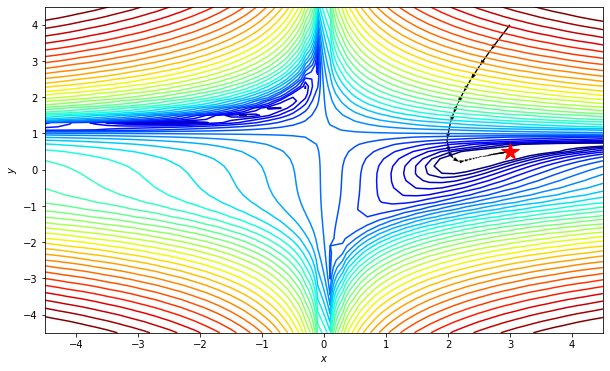

In [12]:
step=0
learning_rate=0.00001
grad=np.ones([2,1])
path_=[]
init= np.array([[3.],[4.]])#np.random.randint(3,size=[2,1])
while(step<600 and (len(grad[abs(grad)>1e-6])>0)) :
    path_.append(init)

    zv,grad=func(init)
    learning_rate=backtracking_line(f=func,x=init,grad_f=grad,t=0.1,verbose=False)
    if step%100==0:
        print(learning_rate)
    init=init-learning_rate*grad
    step+=1

path=np.array(path_).T
path=path[0]

# plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.plot()